In [7]:
from IPython.display import HTML, Image, display

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import sys
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from random import choices
from scipy import stats

sys.path.insert(0, '../src/')

In [2]:
ovr_type = pd.read_csv('../viz/Analysis/Arrest/ovr_Arrest_Type_dist.csv',index_col=[0])
ovr_charge = pd.read_csv('../viz/Analysis/Arrest/ovr_Arrest_Charge_dist.csv',index_col=[0])

type_detailed = pd.read_csv('../viz/Analysis/Arrest/div_Arrest_Type_detailed.csv',index_col=[0,1])
charge_detailed = pd.read_csv('../viz/Analysis/Arrest/div_Arrest_Charge_detailed.csv',index_col=[0,1])

In [3]:
a = pd.read_csv('../data/cleaned/arrests-processed.csv')

In [4]:
a.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Year,predPol Deployed,Total
0,5805106,2019-11-21,2100.0,3,Southwest,328,25,M,Black or African American,5.0,Burglary,Felony,459PC,BURGLARY,2019,PredPol,1
1,190127182,2019-10-03,1000.0,1,Central,119,30,M,Black or African American,20.0,Disorderly Conduct,Misdemeanor,640(D)(3)PC,URINTATIN/DEFECATING ON TRAIN OR SYSTEM,2019,PredPol,1
2,191119468,2019-11-13,1500.0,11,Northeast,1102,39,F,Other,NaN,NaN,Misdemeanor,459.2PC,NaN,2019,PredPol,1
3,4265695,2015-03-11,1315.0,21,Topanga,2118,34,F,Black or African American,3.0,Robbery,Felony,211PC,ROBBERY,2015,PredPol,1
4,4280871,2015-03-26,1200.0,21,Topanga,2172,17,M,Hispanic or Latino,3.0,Robbery,Felony,211PC,ROBBERY,2015,PredPol,1


# Analysis on Arrest Data
### Distribution of Arrest Types

The table below shows the testing results of the overall distribution of arrests by its type. The test used was the T-test which tested whether differences between two means were significant. In our setup, our null hypothesis was that the proportions from each arrest type were the same after PredPol was deployed. Setting $\alpha=0.05$, we were able to reject the null hypothesis for a given arrest type if its p-value was under $\alpha$ and say that the proportion was either higher or lower after PredPol was deployed depending on the resulting statistic. 

In [5]:
ovr_type

,Statistic,P-Value
Felony,-9.47349,0.0
Misdemeanor,4.99374,0.0
Dependent,45.45795,0.0
Infraction,-25.34248,0.0
Other,9.56499,0.0


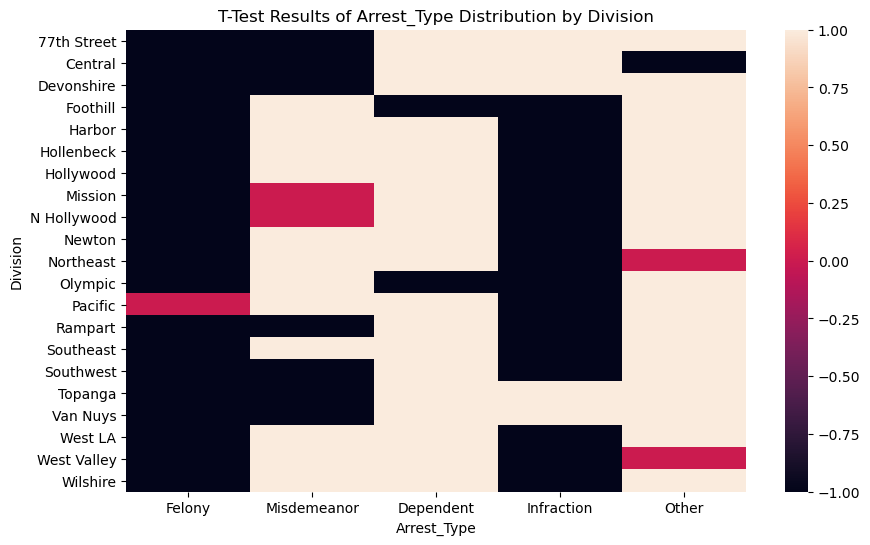

In [8]:
display(Image('../viz/Analysis/Arrest/div_Arrest_Type_dist.png'))

Below is the detailed version of the T-test results by divisions. [BELONGS IN APPENDIX]

In [9]:
type_detailed.head()

Statistic       P-Value
Division    Arrest_Type                         
77th Street Felony      -11.813785  3.480614e-32
            Misdemeanor  -2.501043  1.238439e-02
            Dependent    10.937126  7.942356e-28
            Infraction    6.980175  2.966379e-12
            Other         2.179481  2.929829e-02

In [10]:
charge_detailed

Statistic       P-Value
Division    Arrest_Charge                                          
77th Street Burglary                        10.450566  1.501403e-25
            Disorderly Conduct              16.552597  1.851898e-61
            Robbery                         -6.856883  7.078541e-12
            Weapon (carry/poss)             -1.451320  1.466939e-01
            Miscellaneous Other Violations  -4.166446  3.096448e-05
...                                               ...           ...
Wilshire    Drunkeness                       2.154219  3.122541e-02
            Homicide                        15.505542  3.680485e-54
            Disturbing the Peace             3.368794  7.552622e-04
            Federal Offenses                14.954972  1.639480e-50
            Pre-Delinquency                  9.272656  1.850315e-20

[567 rows x 2 columns]

### Distribution of Arrest Charges

In [11]:
ovr_charge

,Statistic,P-Value
Burglary,8.81167,0.00000
Disorderly Conduct,20.94930,0.00000
Robbery,1.10385,0.26966
Weapon (carry/poss),7.80321,0.00000
Miscellaneous Other Violations,-5.11602,0.00000
Other Assaults,0.74394,0.45691
Aggravated Assault,-37.12976,0.00000
Forgery/Counterfeit,0.93546,0.34955
Rape,-2.30357,0.02125
Narcotic Drug Laws,6.47879,0.00000


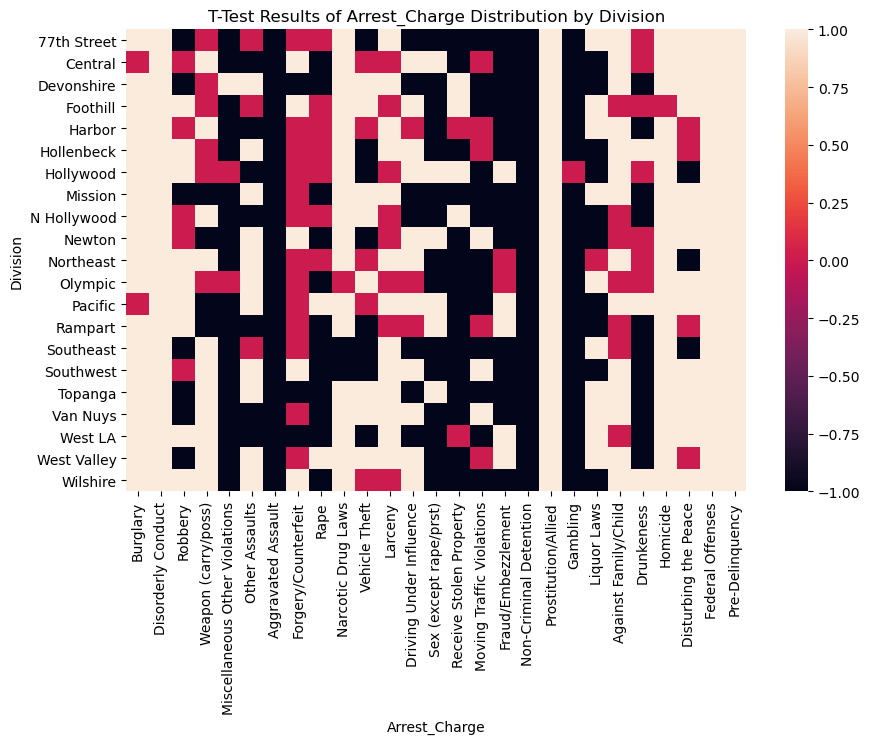

In [12]:
display(Image('../viz/Analysis/Arrest/div_Arrest_Charge_dist.png'))

In [13]:
charge_detailed.head()

Statistic       P-Value
Division    Arrest_Charge                                          
77th Street Burglary                        10.450566  1.501403e-25
            Disorderly Conduct              16.552597  1.851898e-61
            Robbery                         -6.856883  7.078541e-12
            Weapon (carry/poss)             -1.451320  1.466939e-01
            Miscellaneous Other Violations  -4.166446  3.096448e-05